IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      75.0 -0.009756   0.056919    1.966266   0.238497         97.0   
1       8.0 -0.109941   0.039913   -0.442704   0.227791         55.0   
2      35.0 -0.121003   0.039004   -0.422508   0.231398         84.0   
3      79.0 -0.038288   0.010170    1.776025   0.107760         90.0   
4      22.0 -0.038538   0.016932   -0.480703   0.135544        108.0   
...     ...       ...        ...         ...        ...          ...   
1344   30.0 -0.021244   0.006741   -0.473101   0.084703         70.0   
1345    2.0 -0.119719   0.040367   -1.534154   0.233635         66.0   
1346   36.0 -0.063552   0.011919    0.393113   0.126201          0.0   
1347   17.0 -0.045286   0.009916    0.469259   0.109271          0.0   
1348   94.0 -0.003359   0.007144   -0.260725   0.084496          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0   11.743167    9.073536 -0.040524  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.009756   0.056919    1.966266   0.238497         97.0         96.0   
1    -0.109941   0.039913   -0.442704   0.227791         55.0         77.0   
2    -0.121003   0.039004   -0.422508   0.231398         84.0         61.0   
3    -0.038288   0.010170    1.776025   0.107760         90.0         66.0   
4    -0.038538   0.016932   -0.480703   0.135544        108.0         90.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.021244   0.006741   -0.473101   0.084703         70.0         95.0   
1345 -0.119719   0.040367   -1.534154   0.233635         66.0         80.0   
1346 -0.063552   0.011919    0.393113   0.126201          0.0         77.0   
1347 -0.045286   0.009916    0.469259   0.109271          0.0         78.0   
1348 -0.003359   0.007144   -0.260725   0.084496          0.0        103.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.052448    0.02521   -0.903462   0.167045          0.0         94.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340   30.056244    3.736873 -0.015544   0.008095  ...       6077.386712   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         4.974289          0.667494          -1.144814          5.040787   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               125.0               124.0          20.518337   

     amp2(Curr(ESC_5))  Guasto  
340          13.585827       2  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.009756   0.056919    1.966266   0.238497         97.0         96.0   
1    -0.109941   0.039913   -0.442704   0.227791         55.0         77.0   
2    -0.121003   0.039004   -0.422508   0.231398         84.0         61.0   
3    -0.038288   0.010170    1.776025   0.107760         90.0         66.0   
4    -0.038538   0.016932   -0.480703   0.135544        108.0         90.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.021244   0.006741   -0.473101   0.084703         70.0         95.0   
1345 -0.119719   0.040367   -1.534154   0.233635         66.0         80.0   
1346 -0.063552   0.011919    0.393113   0.126201          0.0         77.0   
1347 -0.045286   0.009916    0.469259   0.109271          0.0         78.0   
1348 -0.003359   0.007144   -0.260725   0.084496          0.0        103.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.009756   0.056919    1.966266   0.238497    97.000000    96.000000   
1    -0.109941   0.039913   -0.442704   0.227791    55.000000    77.000000   
2    -0.121003   0.039004   -0.422508   0.231398    84.000000    61.000000   
3    -0.038288   0.010170    1.776025   0.107760    90.000000    66.000000   
4    -0.038538   0.016932   -0.480703   0.135544   108.000000    90.000000   
...        ...        ...         ...        ...          ...          ...   
1615 -0.039864   0.010034    1.805358   0.107705    96.546163    73.636931   
1616 -0.023578   0.009713    2.462129   0.101207    77.929557    58.607964   
1617 -0.034587   0.010075    1.920815   0.106052    71.031488    94.031488   
1618 -0.035076   0.010081    1.906036   0.106241    71.229120    95.000000   
1619 -0.022986   0.006946   -0.505921   0.086347   103.951014    77.237754   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=25)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=25, score_func=<function f_regression at 0x000001F58B235120>)
[False False False False  True False False False  True  True False  True
  True False  True False False  True False False False False  True False
 False False False False  True False  True False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True False False False
 False False False False False False False False  True  True False False
 False False False False False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.390279
28         freq1(AccX)  3.475775
12         freq1(GyrY)  3.119018
11           RMS(GyrY)  2.843309
153   kurt(RPM(ESC_5))  2.752816
9            var(GyrY)  2.693436
14          amp1(GyrY)  2.392778
159   var(Curr(ESC_5))  2.389101
92   freq1(RPM(ESC_1))  2.371278
93   freq2(RPM(ESC_1))  2.367828
104     <>(RPM(ESC_2))  1.953653
8             <>(GyrY)  1.866135
152    var(RPM(ESC_5))  1.861293
78    amp1(RPM(ESC_0))  1.712444
107    RMS(RPM(ESC_2))  1.616481
32            <>(AccY)  1.566202
22          amp1(GyrZ)  1.452568
62         amp1(Pitch)  1.249617
76   freq1(RPM(ESC_0))  1.193272
30          amp1(AccX)  1.139917
77   freq2(RPM(ESC_0))  1.031942
17           var(GyrZ)  0.974808
80     <>(Curr(ESC_0))  0.967646
4          freq1(GyrX)  0.966456
57          var(Pitch)  0.896221
81    var(Curr(ESC_0))  0.834798
156   amp1(RPM(ESC_5))  0.826459
19           RMS(GyrZ)  0.746691
97    var(Curr(ESC_1))  0.686039
15        

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 5, 6, 7, 10, 13, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  \
0       97.000000 -0.040524   0.035106   0.191483     0.000000   23.081574   
1       55.000000  0.048174   0.010559   0.113361    99.000000    6.897400   
2       84.000000  0.042030   0.010444   0.110378    99.000000    4.384935   
3       90.000000 -0.010366   0.005834   0.076992   129.000000    8.296443   
4      108.000000 -0.005827   0.027727   0.166393     0.000000   27.929524   
...           ...       ...        ...        ...          ...         ...   
1615    96.546163 -0.010603   0.005741   0.076424   108.453837    7.875645   
1616    77.929557 -0.008133   0.006324   0.079831   108.035222    5.456432   
1617    71.031488 -0.009725   0.005933   0.077542   118.163408    8.422544   
1618    71.229120 -0.009812   0.005924   0.077497   116.361173    8.445455   
1619   103.951014  0.044923   0.012513   0.120412   107.139782   17.903757   

      var(GyrZ)  amp1(GyrZ)  freq1(AccX)  amp1(AccX)  ...  freq

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  \
340          0.0 -0.015544   0.008095   0.091205        132.0   15.081236   

     var(GyrZ)  amp1(GyrZ)  freq1(AccX)  amp1(AccX)  ...  freq2(RPM(ESC_0))  \
340   0.057154    2.199003        133.0   12.035488  ...               39.0   

     amp1(RPM(ESC_0))  <>(Curr(ESC_0))  freq1(RPM(ESC_1))  freq2(RPM(ESC_1))  \
340      33643.225129         5.290926              140.0              139.0   

     <>(RPM(ESC_2))  RMS(RPM(ESC_2))  var(RPM(ESC_5))  kurt(RPM(ESC_5))  \
340      6020.58465      6086.579917    755831.587347          0.205256   

     var(Curr(ESC_5))  
340          0.667494  

[1 rows x 25 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.6): # qui invece che 0.5 uso 0.6
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      freq1(GyrX)  <>(GyrY)  var(GyrY)  var(GyrZ)  amp1(GyrZ)  <>(AccY)  \
0       97.000000 -0.040524   0.035106   0.017802    0.846851  0.374798   
1       55.000000  0.048174   0.010559   0.004525    0.556056  0.255504   
2       84.000000  0.042030   0.010444   0.004562    0.578914  0.276182   
3       90.000000 -0.010366   0.005834   0.004177    5.050667  0.169326   
4      108.000000 -0.005827   0.027727   0.014276    1.228278  0.667810   
...           ...       ...        ...        ...         ...       ...   
1615    96.546163 -0.010603   0.005741   0.004100    5.175677  0.176121   
1616    77.929557 -0.008133   0.006324   0.004740    2.200012  0.143402   
1617    71.031488 -0.009725   0.005933   0.004296    4.639452  0.163080   
1618    71.229120 -0.009812   0.005924   0.004276    4.721800  0.164451   
1619   103.951014  0.044923   0.012513   0.008244    3.215544  0.192116   

      kurt(AccY)  amp1(Pitch)  <>(Curr(ESC_0))  freq1(RPM(ESC_1))  \
0       1.334058    19.909213 

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     freq1(GyrX)  <>(GyrY)  var(GyrY)  var(GyrZ)  amp1(GyrZ)  <>(AccY)  \
340          0.0 -0.015544   0.008095   0.057154    2.199003  0.509245   

     kurt(AccY)  amp1(Pitch)  <>(Curr(ESC_0))  freq1(RPM(ESC_1))  \
340    0.411754    68.927484         5.290926              140.0   

     <>(RPM(ESC_2))  var(RPM(ESC_5))  kurt(RPM(ESC_5))  var(Curr(ESC_5))  
340      6020.58465    755831.587347          0.205256          0.667494  


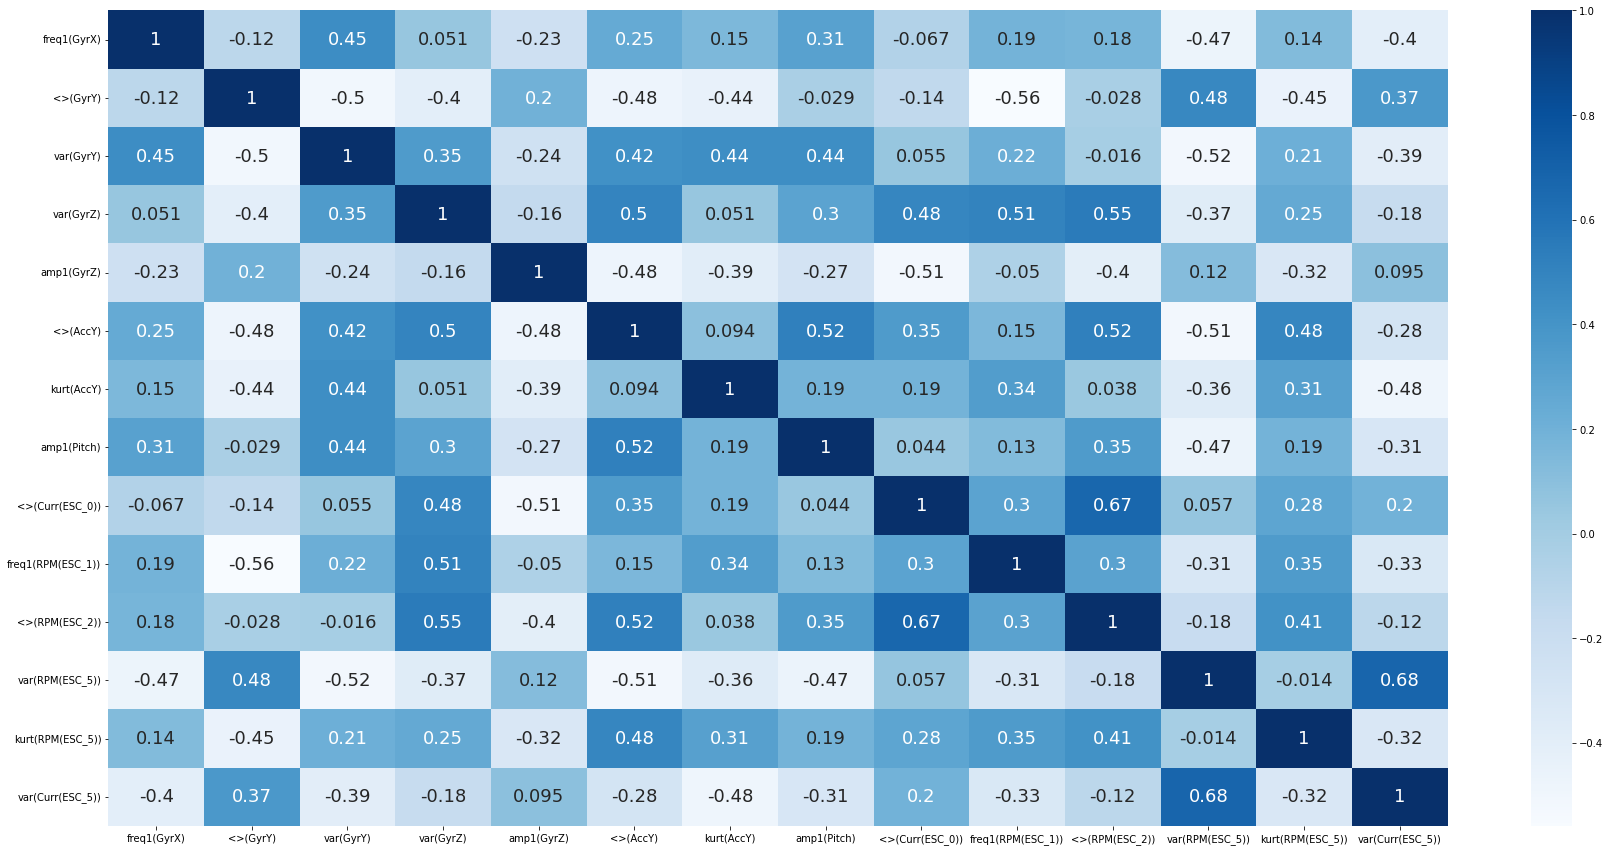

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1296, 14)
(324, 14)
(1296, 1)
(324, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.89230769 0.92664093 0.88803089 0.90733591 0.91891892]
Accuracy: 0.89 	 ---> LogisticRegression 
Test: 2    1
Name: Guasto_test, dtype: int64


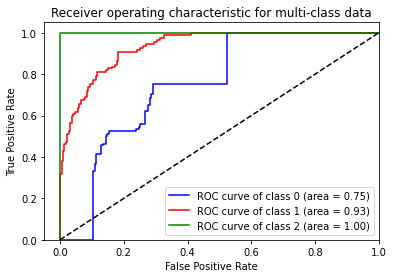

----------------------------------------------------
Cross-Validation: [0.76153846 0.74517375 0.66409266 0.76447876 0.74903475]
Accuracy: 0.74 	 ---> SVC 
Test: 2    1
Name: Guasto_test, dtype: int64


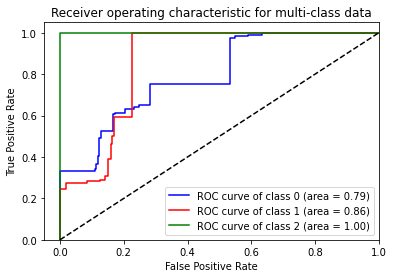

----------------------------------------------------
Cross-Validation: [0.33076923 0.46332046 0.56756757 0.67181467 0.33976834]
Accuracy: 0.5 	 ---> MLPClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


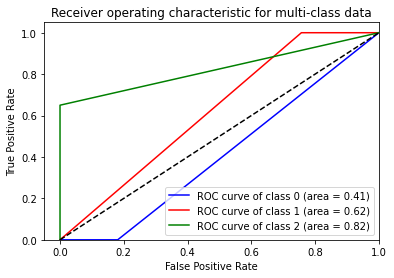

----------------------------------------------------
Cross-Validation: [0.33076923 0.32818533 0.48262548 0.45559846 0.42857143]
Accuracy: 0.55 	 ---> SGDClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64


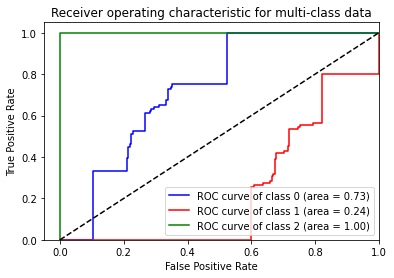

----------------------------------------------------


In [23]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if j != 2:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)
    else:
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

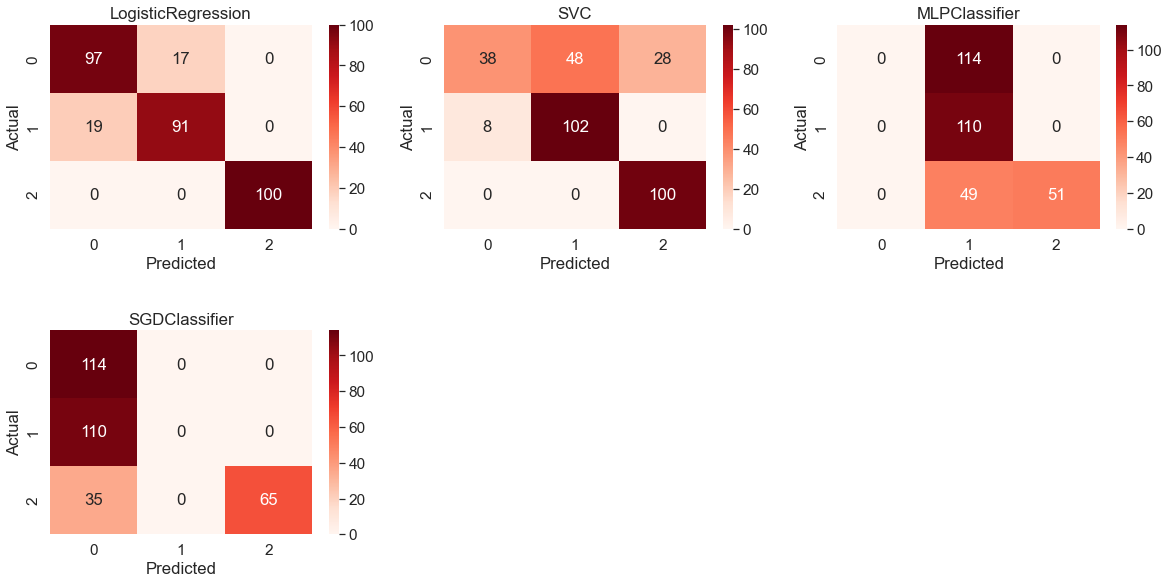

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

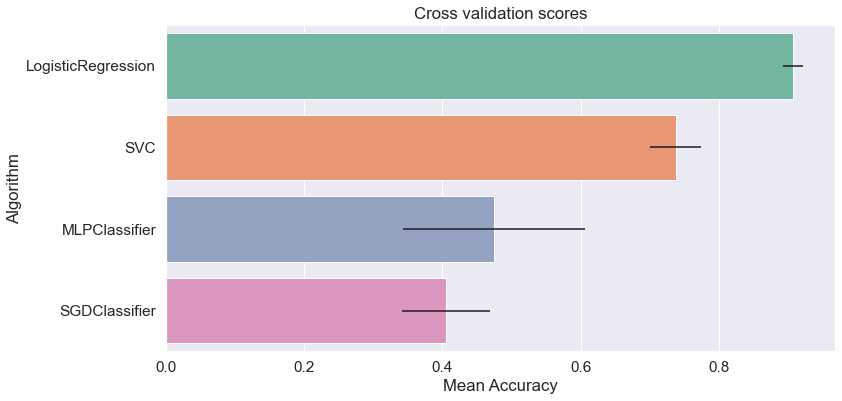

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       114
           1       0.84      0.83      0.83       110
           2       1.00      1.00      1.00       100

    accuracy                           0.89       324
   macro avg       0.89      0.89      0.89       324
weighted avg       0.89      0.89      0.89       324

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.33      0.47       114
           1       0.68      0.93      0.78       110
           2       0.78      1.00      0.88       100

    accuracy                           0.74       324
   macro avg       0.76      0.75      0.71       324
weighted avg       0.76      0.74      0.70       324

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.40